In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instacart-market-basket-analysis/products.csv
/kaggle/input/instacart-market-basket-analysis/order_products__train.csv
/kaggle/input/instacart-market-basket-analysis/orders.csv
/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv
/kaggle/input/instacart-market-basket-analysis/aisles.csv
/kaggle/input/instacart-market-basket-analysis/departments.csv


# Latihan Praktik Data Mining: Clustering Pelanggan

# Daftar Isi

- [Bagian A — Pemahaman dan Eksplorasi Awal](#bagian-a--pemahaman-dan-eksplorasi-awal)
  - [1. Apa saja entitas dan atribut penting dari masing-masing file CSV?](#1-apa-saja-entitas-dan-atribut-penting-dari-masing-masing-file-csv)
  - [2. Jelaskan bagaimana relasi antar file tersebut dan gambarkan diagram skema relasional yang mungkin.](#2-jelaskan-bagaimana-relasi-antar-file-tersebut-dan-gambarkan-diagram-skema-relasional-yang-mungkin)
  - [3. Tampilkan lima baris pertama dari setiap file dan jelaskan informasi apa yang dikandungnya.](#3-tampilkan-lima-baris-pertama-dari-setiap-file-dan-jelaskan-informasi-apa-yang-dikandungnya)
  - [4. Berapa jumlah pelanggan unik dalam dataset? Berapa rata-rata jumlah pesanan per pelanggan?](#4-berapa-jumlah-pelanggan-unik-dalam-dataset-berapa-rata-rata-jumlah-pesanan-per-pelanggan)
  
- [Bagian B — Eksplorasi Data (EDA)](#bagian-b--eksplorasi-data-eda)
  - [1. Produk apa saja yang paling sering dibeli secara keseluruhan? Bagaimana distribusinya?](#1-produk-apa-saja-yang-paling-sering-dibeli-secara-keseluruhan-bagaimana-distribusinya)
  - [2. Produk apa saja yang paling sering dibeli ulang (reorder)? Bandingkan dengan produk yang paling sering dibeli pertama kali.](#2-produk-apa-saja-yang-paling-sering-dibeli-ulang-reorder-bandingkan-dengan-produk-yang-paling-sering-dibeli-pertama-kali)
  - [3. Bagaimana distribusi jumlah produk per pesanan? Apakah terdapat outlier?](#3-bagaimana-distribusi-jumlah-produk-per-pesanan-apakah-terdapat-outlier)
  - [4. Pada hari dan jam berapa pelanggan cenderung melakukan pembelian? Visualisasikan.](#4-pada-hari-dan-jam-berapa-pelanggan-cenderung-melakukan-pembelian-visualisasikan)
  - [5. Adakah pelanggan yang memiliki pola belanja yang jauh berbeda dari yang lain? Bagaimana cara menemukannya?](#5-adakah-pelanggan-yang-memiliki-pola-belanja-yang-jauh-berbeda-dari-yang-lain-bagaimana-cara-menemukannya)

- [Bagian C — Pembersihan Data](#bagian-c--pembersihan-data)
  - [1. Apakah terdapat nilai yang hilang (missing value) dalam data? Di kolom mana saja? Apa tindakan yang sebaiknya dilakukan?](#1-apakah-terdapat-nilai-yang-hilang-missing-value-dalam-data-di-kolom-mana-saja-apa-tindakan-yang-sebaiknya-dilakukan)
  - [2. Apakah terdapat entri duplikat? Jika ya, di kolom apa dan bagaimana cara menanganinya?](#2-apakah-terdapat-entri-duplikat-jika-ya-di-kolom-apa-dan-bagaimana-cara-menanganinya)
  - [3. Apakah ada produk dengan frekuensi pembelian yang sangat rendah? Apakah perlu dihapus? Jelaskan alasanmu](#3-apakah-ada-produk-dengan-frekuensi-pembelian-yang-sangat-rendah-apakah-perlu-dihapus-jelaskan-alasanmu)

- [Bagian D — Feature Engineering](#bagian-d--feature-engineering)
  - [Untuk masing-masing pelanggan (user id), buatlah fitur-fitur berikut dan simpan ke dalam sebuah dataframe baru bernama user features.csv:](#untuk-masing-masing-pelanggan-user-id-buatlah-fitur-fitur-berikut-dan-simpan-ke-dalam-sebuah-dataframe-baru-bernama-user-featurescsv)
    - [1. Berapa total pesanan yang dilakukan setiap pelanggan?](#1-berapa-total-pesanan-yang-dilakukan-setiap-pelanggan)
    - [2. Berapa total produk yang telah dibeli oleh masing-masing pelanggan?](#2-berapa-total-produk-yang-telah-dibeli-oleh-masing-masing-pelanggan)
    - [3. Berapa proporsi produk yang dibeli ulang (reorder ratio) oleh setiap pelanggan?](#3-berapa-proporsi-produk-yang-dibeli-ulang-reorder-ratio-oleh-setiap-pelanggan)
    - [4. Berapa rata-rata hari antara pembelian yang dilakukan oleh pelanggan?](#4-berapa-rata-rata-hari-antara-pembelian-yang-dilakukan-oleh-pelanggan)
    - [5. Kategori produk apa (berdasarkan aisle) yang paling sering dibeli oleh masing-masing pelanggan?](#5-kategori-produk-apa-berdasarkan-aisle-yang-paling-sering-dibeli-oleh-masing-masing-pelanggan)

- [Bagian E — Reduksi Dimensi (Opsional)](#bagian-e--reduksi-dimensi-opsional)
  - [1. Apakah fitur-fitur pelanggan yang kamu buat memiliki korelasi yang tinggi? Tampilkan matriks korelasinya.](#1-apakah-fitur-fitur-pelanggan-yang-kamu-buat-memiliki-korelasi-yang-tinggi-tampilkan-matriks-korelasinya)
  - [2. Lakukan reduksi dimensi dengan PCA atau UMAP terhadap user features.csv. Visualisasikan hasilnya dalam 2 dimensi.](#2-lakukan-reduksi-dimensi-dengan-pca-atau-umap-terhadap-user-featurescsv-visualisasikan-hasilnya-dalam-2-dimensi)

- [Bagian F — Clustering](#bagian-f--clustering)

  - [Soal 1 dan 4](#soal-1-dan-4)
    - [KMeans](#kmeans)
  - [3. Visualisasikan hasil clustering (misalnya hasil PCA/UMAP diberi warna berdasarkan klaster).](#3-visualisasikan-hasil-clustering-misalnya-hasil-pcaumap-diberi-warna-berdasarkan-klaster)
  - [2. Coba metode clustering alternatif seperti DBSCAN atau Agglomerative. Bandingkan hasilnya.](#2-coba-metode-clustering-alternatif-seperti-dbscan-atau-agglomerative-bandingkan-hasilnya)
    - [DBSCAN](#dbscan)

- [Bagian G — Interpretasi & Insight](#bagian-g--interpretasi--insight)
  - [1. Profilkan tiap klaster: apa ciri khas dari pelanggan di klaster tersebut berdasarkan fitur yang telah kamu buat?](#1-profilkan-tiap-klaster-apa-ciri-khas-dari-pelanggan-di-klaster-tersebut-berdasarkan-fitur-yang-telah-kamu-buat)
  - [2. Apakah ada klaster pelanggan yang memiliki perilaku sangat berbeda dari yang lain? Berikan contoh.](#2-apakah-ada-klaster-pelanggan-yang-memiliki-perilaku-sangat-berbeda-dari-yang-lain-berikan-contoh)
  - [3. Bagaimana hasil klasterisasi ini bisa digunakan oleh perusahaan seperti Instacart untuk meningkatkan layanan atau strategi pemasaran?](#3-bagaimana-hasil-klasterisasi-ini-bisa-digunakan-oleh-perusahaan-seperti-instacart-untuk-meningkatkan-layanan-atau-strategi-pemasaran)

# Bagian A — Pemahaman dan Eksplorasi Awal 

## 1. Apa saja entitas dan atribut penting dari masing-masing file CSV? 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Fungsi untuk menampilkan preview data
def preview_csv(file_path, name):
    df = pd.read_csv(file_path, nrows=5)
    print(f"\n{'-'*50}")
    print(f"File: {name} (5 baris pertama)")
    print('-'*50)
    print(df)
    return df

# Membaca dan menampilkan data
print("="*50)
print("ANALISIS DATASET INSTACART MARKET BASKET")
print("="*50)

# Preview semua file
aisles = preview_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv', '/kaggle/input/instacart-market-basket-analysis/aisles.csv')
dept = preview_csv('/kaggle/input/instacart-market-basket-analysis/departments.csv', '/kaggle/input/instacart-market-basket-analysis/departments.csv')
products = preview_csv('/kaggle/input/instacart-market-basket-analysis/products.csv', '/kaggle/input/instacart-market-basket-analysis/products.csv')
orders = preview_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv', '/kaggle/input/instacart-market-basket-analysis/orders.csv')
order_prior = preview_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv', '/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv')
order_train = preview_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv', '/kaggle/input/instacart-market-basket-analysis/order_products__train.csv')


ANALISIS DATASET INSTACART MARKET BASKET

--------------------------------------------------
File: /kaggle/input/instacart-market-basket-analysis/aisles.csv (5 baris pertama)
--------------------------------------------------
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

--------------------------------------------------
File: /kaggle/input/instacart-market-basket-analysis/departments.csv (5 baris pertama)
--------------------------------------------------
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

--------------------------------------------------
File: /kaggle/input/instacart-market-basket-analysis/products.csv (5 baris pertama)
----------------------------------------

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## 2. Jelaskan bagaimana relasi antar file tersebut dan gambarkan diagram skema relasional yang mungkin.


Diagram Relasional


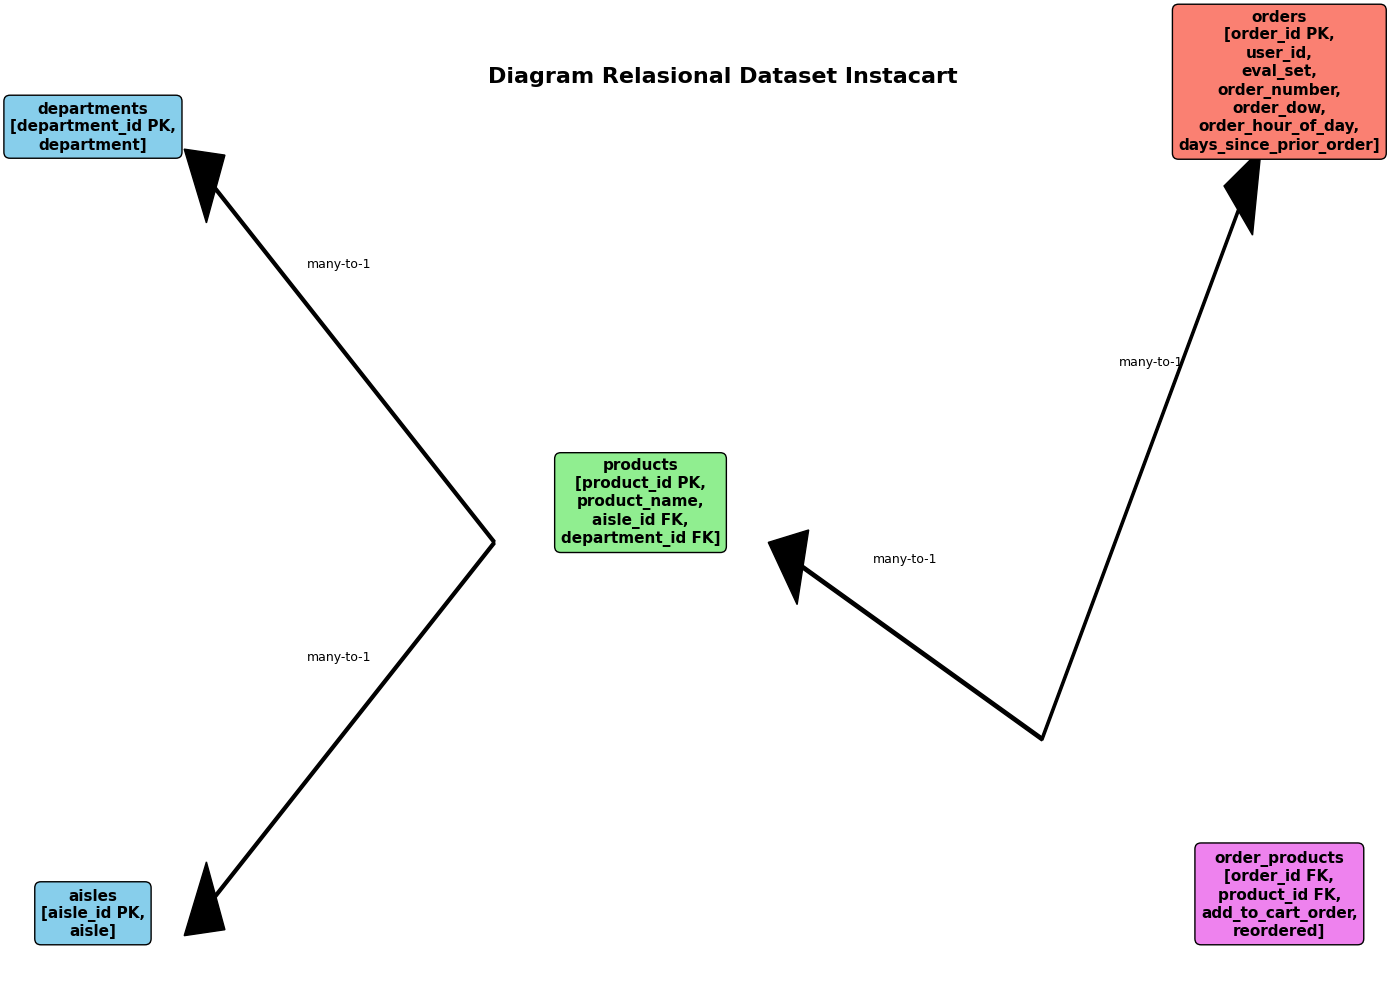

In [4]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Header Output
print("\n" + "="*60)
print("Diagram Relasional")
print("="*60)

# Inisialisasi diagram
plt.figure(figsize=(14, 10))
font_prop = FontProperties(weight='bold', size=11)

# ENTITAS
plt.text(0.1, 0.9, "departments\n[department_id PK,\ndepartment]", 
         bbox=dict(boxstyle="round,pad=0.4", fc="skyblue"),
         fontproperties=font_prop, ha='center')

plt.text(0.1, 0.7, "aisles\n[aisle_id PK,\naisle]", 
         bbox=dict(boxstyle="round,pad=0.4", fc="skyblue"),
         fontproperties=font_prop, ha='center')

plt.text(0.4, 0.8, "products\n[product_id PK,\nproduct_name,\naisle_id FK,\ndepartment_id FK]", 
         bbox=dict(boxstyle="round,pad=0.4", fc="lightgreen"),
         fontproperties=font_prop, ha='center')

plt.text(0.75, 0.9, "orders\n[order_id PK,\nuser_id,\neval_set,\norder_number,\norder_dow,\norder_hour_of_day,\ndays_since_prior_order]", 
         bbox=dict(boxstyle="round,pad=0.4", fc="salmon"),
         fontproperties=font_prop, ha='center')

plt.text(0.75, 0.7, "order_products\n[order_id FK,\nproduct_id FK,\nadd_to_cart_order,\nreordered]", 
         bbox=dict(boxstyle="round,pad=0.4", fc="violet"),
         fontproperties=font_prop, ha='center')

# RELASI ANTAR ENTITAS
def draw_arrow(x1, y1, x2, y2, label):
    plt.arrow(x1, y1, x2 - x1, y2 - y1, 
              head_width=0.02, head_length=0.02, fc='black', length_includes_head=True)
    plt.text((x1 + x2) / 2, (y1 + y2) / 2 + 0.02, label, fontsize=9, ha='center')

# products -> departments
draw_arrow(0.32, 0.8, 0.15, 0.9, "many-to-1")

# products -> aisles
draw_arrow(0.32, 0.8, 0.15, 0.7, "many-to-1")

# order_products -> products
draw_arrow(0.62, 0.75, 0.47, 0.8, "many-to-1")

# order_products -> orders
draw_arrow(0.62, 0.75, 0.74, 0.9, "many-to-1")

# Tambahkan Judul dan Format
plt.title("Diagram Relasional Dataset Instacart", fontsize=16, weight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig('instacart_relational_diagram.png')
plt.show()


## 3. Tampilkan lima baris pertama dari setiap file dan jelaskan informasi apa yang dikandungnya.

In [5]:
import pandas as pd

# Daftar file CSV dalam dataset
files = [
    '/kaggle/input/instacart-market-basket-analysis/aisles.csv',
    '/kaggle/input/instacart-market-basket-analysis/departments.csv',
    '/kaggle/input/instacart-market-basket-analysis/products.csv',
    '/kaggle/input/instacart-market-basket-analysis/orders.csv',
    '/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv',
    '/kaggle/input/instacart-market-basket-analysis/order_products__train.csv'
]

# Membaca dan menampilkan 5 baris pertama setiap file
for file_path in files:
    print(f"\n{'-'*50}")
    print(f"File: {file_path.split('/')[-1]}")  # Hanya nama file
    print(f"{'-'*50}")
    
    # Membaca file dengan hanya mengambil 5 baris pertama
    df = pd.read_csv(file_path, nrows=5)
    
    # Menampilkan data
    print(df.to_string(index=False))  # Menampilkan tanpa index
    
    # Menampilkan penjelasan singkat
    print("\nPenjelasan:")
    if 'aisles' in file_path:
        print("- Setiap baris mewakili kategori lorong belanja (aisle)")
        print("- `aisle_id`: ID unik untuk setiap lorong")
        print("- `aisle`: Nama kategori lorong (contoh: 'prepared soups salads')")
    elif 'departments' in file_path:
        print("- Setiap baris mewakili kategori departemen")
        print("- `department_id`: ID unik untuk setiap departemen")
        print("- `department`: Nama departemen (contoh: 'frozen')")
    elif 'products' in file_path:
        print("- Setiap baris mewakili produk yang dijual")
        print("- `product_id`: ID unik produk")
        print("- `product_name`: Nama lengkap produk")
        print("- `aisle_id`: ID lorong tempat produk berada (foreign key ke aisles.csv)")
        print("- `department_id`: ID departemen tempat produk berada (foreign key ke departments.csv)")
    elif 'orders' in file_path:
        print("- Setiap baris mewakili pesanan yang dibuat oleh pelanggan")
        print("- `order_id`: ID unik pesanan")
        print("- `user_id`: ID pelanggan yang membuat pesanan")
        print("- `eval_set`: Kategori data ('prior' untuk data historis, 'train' untuk data pelatihan)")
        print("- `order_number`: Urutan pesanan ke-n untuk pelanggan tersebut")
        print("- `order_dow`: Hari pesanan (0=Minggu, 1=Senin, ..., 6=Sabtu)")
        print("- `order_hour_of_day`: Jam pesanan dibuat (format 24 jam)")
        print("- `days_since_prior`: Jarak hari sejak pesanan sebelumnya (NaN untuk pesanan pertama)")
    elif 'order_products' in file_path:
        print("- Setiap baris mewakili item produk dalam sebuah pesanan")
        print("- `order_id`: ID pesanan (foreign key ke orders.csv)")
        print("- `product_id`: ID produk yang dipesan (foreign key ke products.csv)")
        print("- `add_to_cart_order`: Urutan produk ditambahkan ke keranjang (1 = pertama)")
        print("- `reordered`: Indikator apakah produk pernah dipesan sebelumnya (1 = ya, 0 = tidak)")
    print()


--------------------------------------------------
File: aisles.csv
--------------------------------------------------
 aisle_id                      aisle
        1      prepared soups salads
        2          specialty cheeses
        3        energy granola bars
        4              instant foods
        5 marinades meat preparation

Penjelasan:
- Setiap baris mewakili kategori lorong belanja (aisle)
- `aisle_id`: ID unik untuk setiap lorong
- `aisle`: Nama kategori lorong (contoh: 'prepared soups salads')


--------------------------------------------------
File: departments.csv
--------------------------------------------------
 department_id department
             1     frozen
             2      other
             3     bakery
             4    produce
             5    alcohol

Penjelasan:
- Setiap baris mewakili kategori departemen
- `department_id`: ID unik untuk setiap departemen
- `department`: Nama departemen (contoh: 'frozen')


--------------------------------------

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


## 4. Berapa jumlah pelanggan unik dalam dataset? Berapa rata-rata jumlah pesanan per pelanggan?


Analisis Pelanggan
1. Jumlah pelanggan unik: 206,209
2. Total pesanan: 3,421,083
3. Rata-rata pesanan per pelanggan: 16.59

Distribusi Jumlah Pesanan per Pelanggan


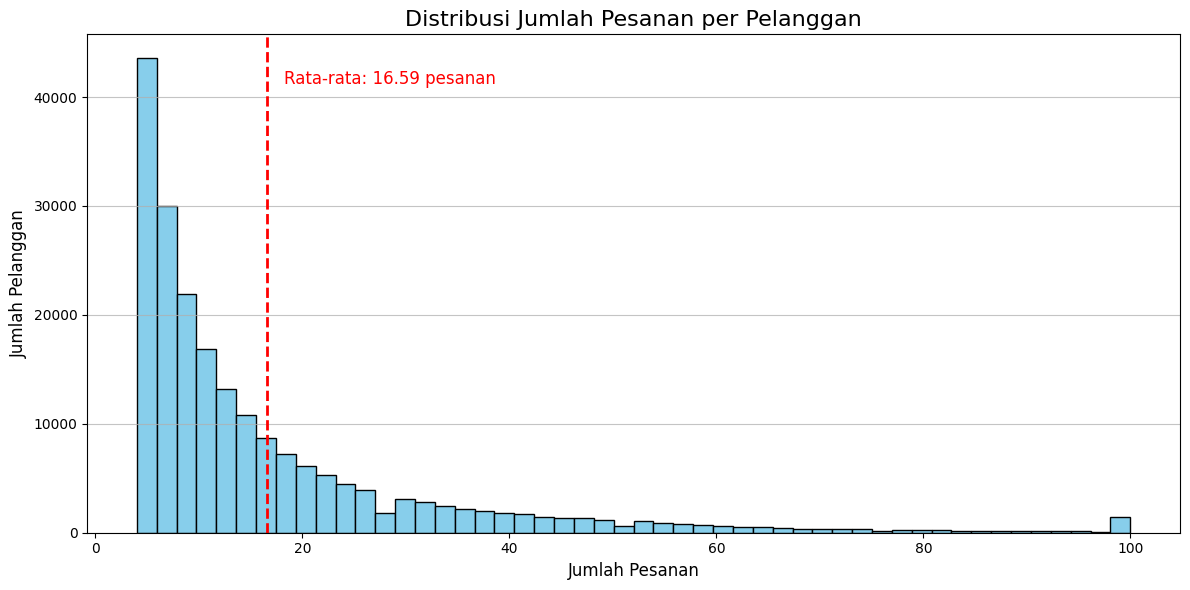


Statistik Deskriptif:
count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000


In [6]:
# Baca file orders.csv
orders = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv')

# Jumlah pelanggan unik
unique_customers = orders['user_id'].nunique()

# Total pesanan
total_orders = orders.shape[0]

# Rata-rata pesanan per pelanggan
avg_orders = total_orders / unique_customers

# Hasil analisis
print("\n" + "="*60)
print("Analisis Pelanggan")
print("="*60)
print(f"1. Jumlah pelanggan unik: {unique_customers:,}")
print(f"2. Total pesanan: {total_orders:,}")
print(f"3. Rata-rata pesanan per pelanggan: {avg_orders:.2f}")

# Visualisasi distribusi jumlah pesanan per pelanggan
print("\n" + "="*60)
print("Distribusi Jumlah Pesanan per Pelanggan")
print("="*60)

# Hitung jumlah pesanan per pelanggan
orders_per_user = orders.groupby('user_id')['order_number'].max()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(orders_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Pesanan per Pelanggan', fontsize=16)
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.axvline(orders_per_user.mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(orders_per_user.mean()*1.1, plt.ylim()[1]*0.9, 
         f'Rata-rata: {orders_per_user.mean():.2f} pesanan', 
         fontsize=12, color='red')
plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(orders_per_user.describe().to_string())

# Bagian B — Eksplorasi Data (EDA)

## 1. Produk apa saja yang paling sering dibeli secara keseluruhan? Bagaimana distribusinya?

Top 10 Produk Paling Sering Dibeli:
          product_name  total_orders
                Banana        491291
Bag of Organic Bananas        394930
  Organic Strawberries        275577
  Organic Baby Spinach        251705
  Organic Hass Avocado        220877
       Organic Avocado        184224
           Large Lemon        160792
          Strawberries        149445
                 Limes        146660
    Organic Whole Milk        142813


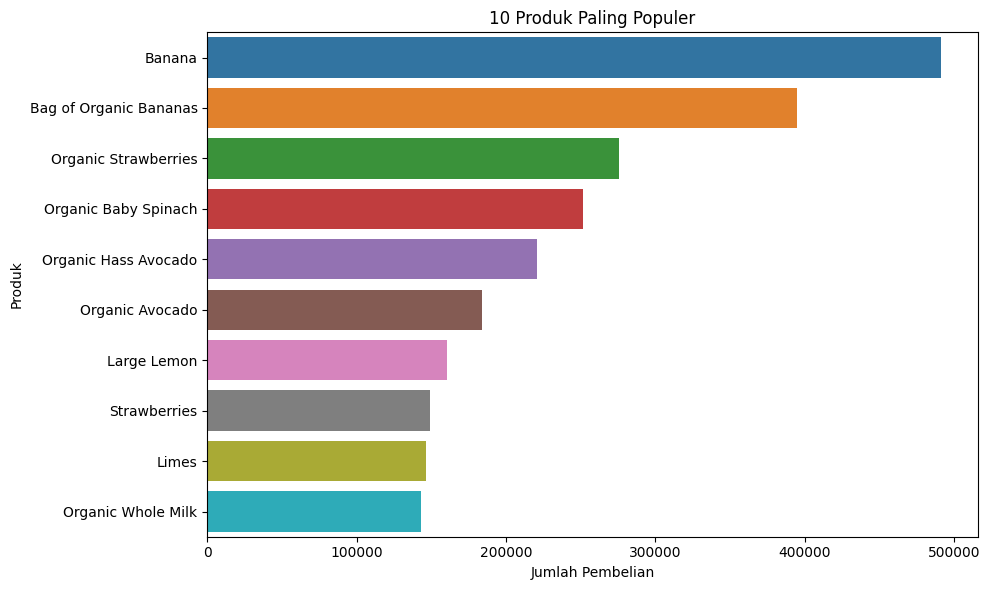

In [7]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# LOAD DATASETS
aisles = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv')
products = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/products.csv')
orders = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv')
order_products_prior = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv')

# Gabungkan data pesanan
order_products = pd.concat([order_products_prior, order_products_train])

#1 PRODUK PALING SERING DIBELI
# Gabungkan data produk dengan pesanan
product_counts = order_products.merge(products, on='product_id') \
    .groupby('product_id')['order_id'].count() \
    .reset_index(name='total_orders') \
    .sort_values('total_orders', ascending=False) \
    .head(10)

# Gabungkan dengan nama produk
top_products = product_counts.merge(
    products[['product_id', 'product_name']], on='product_id'
)

print("Top 10 Produk Paling Sering Dibeli:")
print(top_products[['product_name', 'total_orders']].to_string(index=False))

# Visualisasi distribusi
plt.figure(figsize=(10, 6))
sns.barplot(x='total_orders', y='product_name', data=top_products)
plt.title('10 Produk Paling Populer')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Produk')
plt.tight_layout()
plt.savefig('top_products.png', dpi=300)
plt.show()


## 2. Produk apa saja yang paling sering dibeli ulang (reorder)? Bandingkan dengan produk yang paling sering dibeli pertama kali.

In [8]:
# 2 PRODUK SERING DIREORDER vs PEMBELIAN PERTAMA
# Hitung reorder rate
product_stats = order_products.groupby('product_id').agg(
    total_orders=('order_id', 'count'),
    reorder_rate=('reordered', 'mean')
).reset_index()

# Produk dengan reorder rate tertinggi
top_reordered = product_stats.sort_values('reorder_rate', ascending=False) \
    .head(5) \
    .merge(products[['product_id', 'product_name']], on='product_id')

# Produk dengan reorder rate terendah (pembelian pertama)
top_first_time = product_stats[product_stats['total_orders'] > 100] \
    .sort_values('reorder_rate') \
    .head(5) \
    .merge(products[['product_id', 'product_name']], on='product_id')

print("\nTop 5 Produk Sering Direorder:")
print(top_reordered[['product_name', 'reorder_rate']].to_string(index=False))

print("\nTop 5 Produk Pembelian Pertama:")
print(top_first_time[['product_name', 'reorder_rate']].to_string(index=False))


Top 5 Produk Sering Direorder:
                            product_name  reorder_rate
                     Raw Veggie Wrappers      0.942029
Serenity Ultimate Extrema Overnight Pads      0.933333
                     Orange Energy Shots      0.923077
                      Chocolate Love Bar      0.921569
               Soy Powder Infant Formula      0.914286

Top 5 Produk Pembelian Pertama:
              product_name  reorder_rate
               Ground Sage      0.004673
     Organic Caraway Seeds      0.007042
      Organic Whole Nutmeg      0.009434
Organic Chinese Five Spice      0.011236
             Food Coloring      0.015152


## 3. Bagaimana distribusi jumlah produk per pesanan? Apakah terdapat outlier?


Statistik Produk per Pesanan:
count    3.346083e+06
mean     1.010707e+01
std      7.542326e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
Name: product_id, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


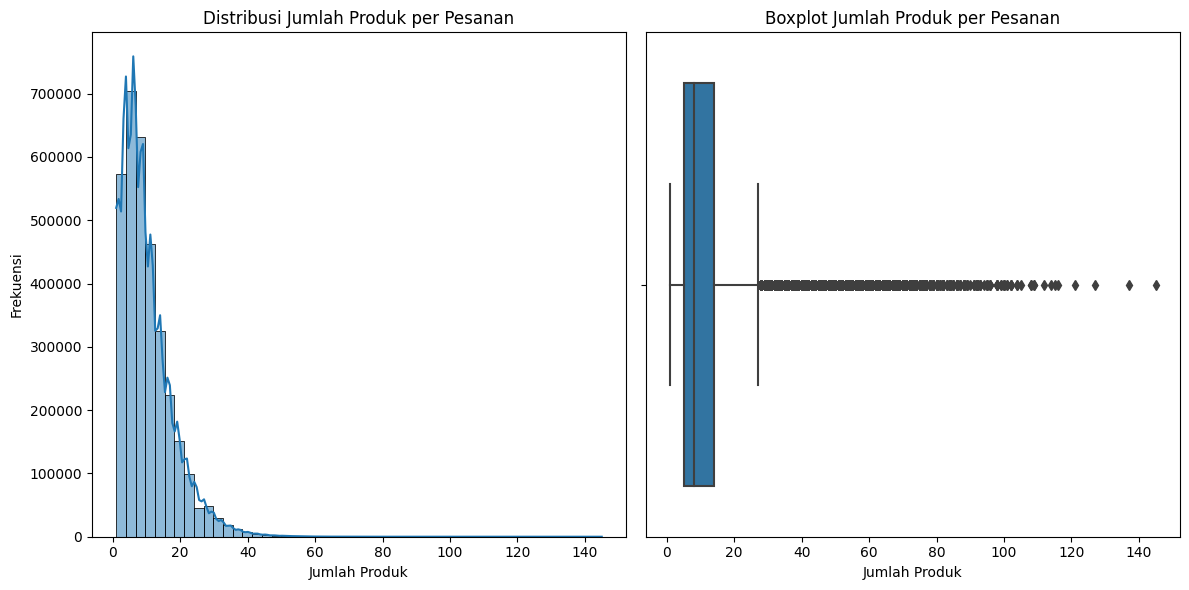


Persentase Pesanan Outlier: 3.30%


In [9]:
# 3 DISTRIBUSI PRODUK PER PESANAN
# Hitung jumlah produk per pesanan
products_per_order = order_products.groupby('order_id')['product_id'].count()

print("\nStatistik Produk per Pesanan:")
print(products_per_order.describe())

# Visualisasi distribusi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(products_per_order, bins=50, kde=True)
plt.title('Distribusi Jumlah Produk per Pesanan')
plt.xlabel('Jumlah Produk')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(x=products_per_order)
plt.title('Boxplot Jumlah Produk per Pesanan')
plt.xlabel('Jumlah Produk')

plt.tight_layout()
plt.savefig('products_per_order.png', dpi=300)
plt.show()

# Identifikasi outlier
Q1 = products_per_order.quantile(0.25)
Q3 = products_per_order.quantile(0.75)
IQR = Q3 - Q1
outliers = products_per_order[
    (products_per_order < (Q1 - 1.5 * IQR)) | 
    (products_per_order > (Q3 + 1.5 * IQR))
]

print(f"\nPersentase Pesanan Outlier: {len(outliers)/len(products_per_order)*100:.2f}%")

## 4. Pada hari dan jam berapa pelanggan cenderung melakukan pembelian? Visualisasikan.

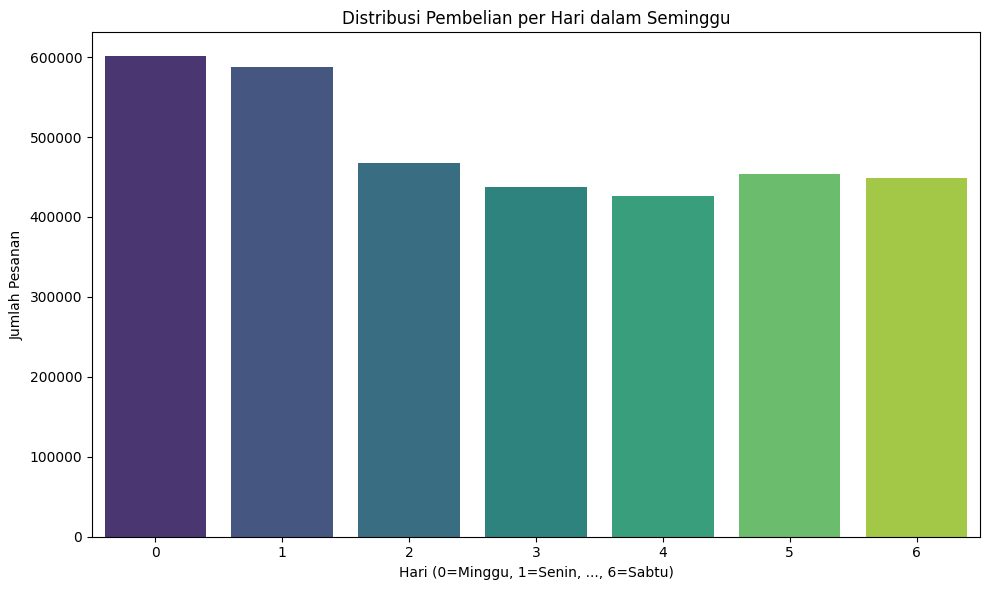

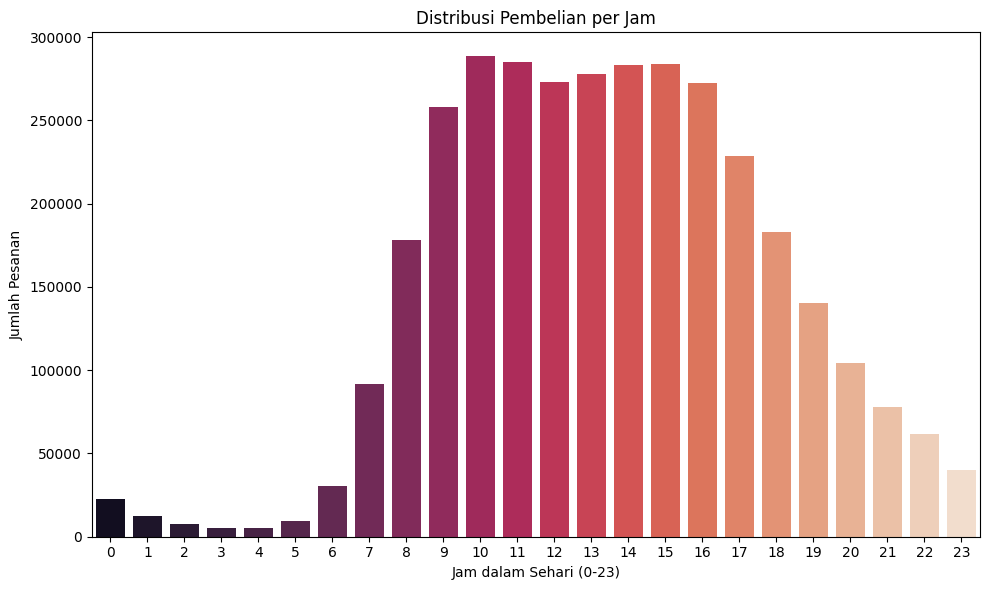

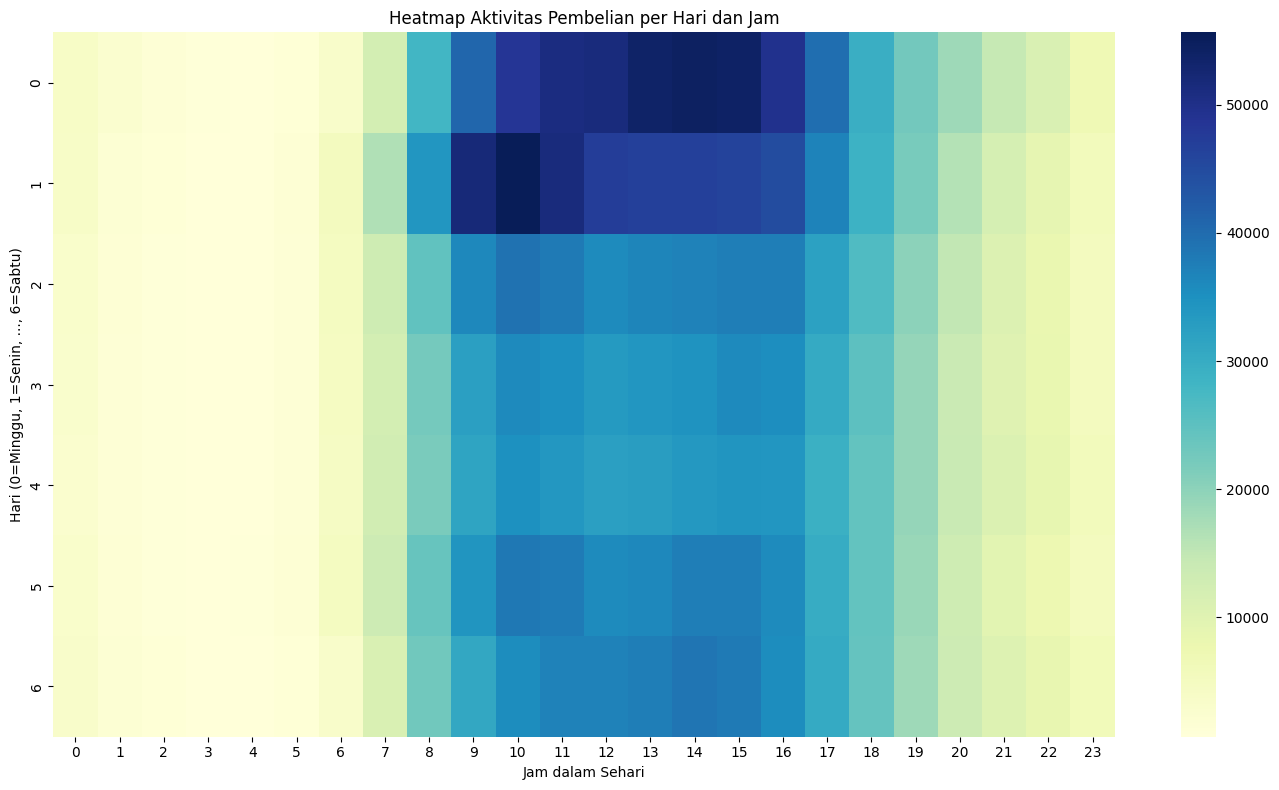

In [10]:
# 4 POLA WAKTU PEMBELIAN
# Analisis hari
plt.figure(figsize=(10, 6))
sns.countplot(x='order_dow', data=orders, palette='viridis')
plt.title('Distribusi Pembelian per Hari dalam Seminggu')
plt.xlabel('Hari (0=Minggu, 1=Senin, ..., 6=Sabtu)')
plt.ylabel('Jumlah Pesanan')
plt.tight_layout()
plt.savefig('orders_by_day.png', dpi=300)
plt.show()

# Analisis jam
plt.figure(figsize=(10, 6))
sns.countplot(x='order_hour_of_day', data=orders, palette='rocket')
plt.title('Distribusi Pembelian per Jam')
plt.xlabel('Jam dalam Sehari (0-23)')
plt.ylabel('Jumlah Pesanan')
plt.tight_layout()
plt.savefig('orders_by_hour.png', dpi=300)
plt.show()

# Heatmap hari vs jam
heatmap_data = orders.groupby(['order_dow', 'order_hour_of_day']) \
    .size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt='g')
plt.title('Heatmap Aktivitas Pembelian per Hari dan Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari (0=Minggu, 1=Senin, ..., 6=Sabtu)')
plt.tight_layout()
plt.savefig('order_heatmap.png', dpi=300)
plt.show()

## 5. Adakah pelanggan yang memiliki pola belanja yang jauh berbeda dari yang lain? Bagaimana cara menemukannya?


Pelanggan dengan Pola Unik:
 user_id  total_orders  avg_products_per_order  reorder_rate  unique_products
      14            14                     221      0.343891              145
      31            21                     299      0.364548              190
      54            78                     619      0.596123              250
     122            30                     120      0.600000               48
     133            21                     544      0.507353              268
     140            77                    1174      0.739353              306
     143            15                     236      0.487288              121
     155            23                     244      0.795082               50
     160            13                     285      0.547368              129
     173            45                     431      0.438515              242


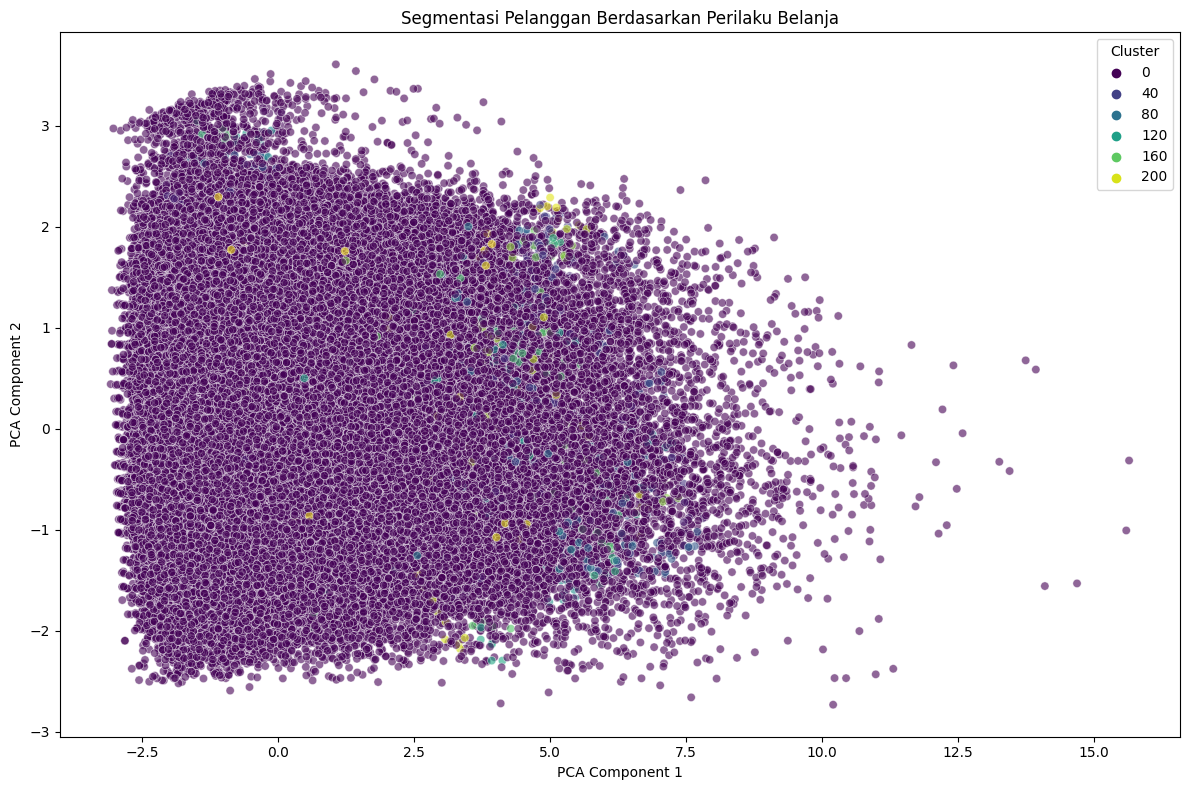


Karakteristik Pelanggan dengan Pola Unik:
             user_id  total_orders  avg_days_between  favorite_dow  favorite_hod  avg_products_per_order  reorder_rate  unique_products          pca1          pca2  cluster
count   13507.000000  13507.000000      13507.000000  13507.000000  13507.000000            13507.000000  13507.000000     13507.000000  13507.000000  13507.000000  13507.0
mean   102295.478567     46.495003          8.404505      2.924558     12.786851              555.778263      0.642480       158.923817      3.342716      0.249803     -1.0
std     59451.188147     29.147310          5.867733      1.995852      5.766441              410.087897      0.196290        97.217903      2.587317      1.135714      0.0
min        14.000000      4.000000          0.000000      0.000000      0.000000                3.000000      0.000000         1.000000     -2.869697     -2.730198     -1.0
25%     50726.000000     21.000000          4.468418      1.000000      9.000000            

In [11]:
# 5 IDENTIFIKASI POLA BELANJA UNIK 
customer_orders = orders.groupby('user_id').agg(
    total_orders=('order_id', 'count'),
    avg_days_between=('days_since_prior_order', 'mean'),
    favorite_dow=('order_dow', lambda x: x.mode()[0]),
    favorite_hod=('order_hour_of_day', lambda x: x.mode()[0])
).reset_index()

order_details = order_products.merge(orders, on='order_id')
customer_products = order_details.groupby('user_id').agg(
    avg_products_per_order=('product_id', 'count'),
    reorder_rate=('reordered', 'mean'),
    unique_products=('product_id', 'nunique')
).reset_index()

customer_data = customer_orders.merge(customer_products, on='user_id')

# Lanjutkan dengan normalisasi dan analisis seperti semula
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop('user_id', axis=1))

# Analisis PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
customer_data['pca1'] = pca_result[:, 0]
customer_data['pca2'] = pca_result[:, 1]

# Deteksi outlier dengan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)
customer_data['cluster'] = clusters

# Identifikasi outlier (cluster = -1)
outlier_customers = customer_data[customer_data['cluster'] == -1]

print("\nPelanggan dengan Pola Unik:")
print(outlier_customers[['user_id', 'total_orders', 'avg_products_per_order', 
                         'reorder_rate', 'unique_products']].head(10).to_string(index=False))

# Visualisasi cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='pca1', y='pca2', 
    hue='cluster', 
    palette='viridis',
    data=customer_data,
    alpha=0.6
)
plt.title('Segmentasi Pelanggan Berdasarkan Perilaku Belanja')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('customer_clusters.png', dpi=300)
plt.show()

# Analisis outlier
print("\nKarakteristik Pelanggan dengan Pola Unik:")
print(outlier_customers.describe().to_string())

# Bagian C — Pembersihan Data

## 1. Apakah terdapat nilai yang hilang (missing value) dalam data? Di kolom mana saja? Apa tindakan yang sebaiknya dilakukan?

In [12]:
# 1 Periksa missing values di setiap dataset
datasets = {
    '/kaggle/input/instacart-market-basket-analysis/aisles.csv': aisles,
    '/kaggle/input/instacart-market-basket-analysis/departments.csv': departments,
    '/kaggle/input/instacart-market-basket-analysis/products.csv': products,
    '/kaggle/input/instacart-market-basket-analysis/orders.csv': orders,
    '/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv': order_products_prior,
    '/kaggle/input/instacart-market-basket-analysis/order_products__train.csv': order_products_train
}

missing_data = {}
for name, df in datasets.items():
    missing_count = df.isnull().sum()
    missing_data[name] = missing_count[missing_count > 0]

# Cetak hasil 
print("=" * 50)
print("LAPORAN MISSING VALUES PER DATASET")
print("=" * 50)
for name, missing in missing_data.items():
    if not missing.empty:
        print(f"\nFile: {name}")
        print("-" * 30)
        print(missing)
    else:
        print(f"\nFile: {name} - TIDAK ADA MISSING VALUES")

LAPORAN MISSING VALUES PER DATASET

File: /kaggle/input/instacart-market-basket-analysis/aisles.csv - TIDAK ADA MISSING VALUES

File: /kaggle/input/instacart-market-basket-analysis/departments.csv - TIDAK ADA MISSING VALUES

File: /kaggle/input/instacart-market-basket-analysis/products.csv - TIDAK ADA MISSING VALUES

File: /kaggle/input/instacart-market-basket-analysis/orders.csv
------------------------------
days_since_prior_order    206209
dtype: int64

File: /kaggle/input/instacart-market-basket-analysis/order_products__prior.csv - TIDAK ADA MISSING VALUES

File: /kaggle/input/instacart-market-basket-analysis/order_products__train.csv - TIDAK ADA MISSING VALUES


In [13]:
# Khusus untuk orders: tampilkan 5 baris dengan missing value di 'days_since_prior_order'
if '/kaggle/input/instacart-market-basket-analysis/orders.csv' in datasets:
    orders_df = datasets['/kaggle/input/instacart-market-basket-analysis/orders.csv']
    
    if 'days_since_prior_order' in orders_df.columns:
        # Cek apakah ada missing value di kolom ini
        if orders_df['days_since_prior_order'].isnull().sum() > 0:
            print("\n" + "=" * 70)
            print("5 BARIS DENGAN MISSING VALUE PADA 'days_since_prior_order' (orders.csv):")
            print("=" * 70)
            
            # Ambil 5 baris yang missing
            missing_samples = orders_df[orders_df['days_since_prior_order'].isnull()].head()
            
            # Tampilkan kolom yang relevan
            print(missing_samples[['order_id', 'user_id', 'order_number', 'days_since_prior_order']])
        else:
            print("\nTidak ada missing value pada kolom 'days_since_prior_order' di orders.csv.")
    else:
        print("\nKolom 'days_since_prior_order' tidak ditemukan di orders.csv.")


5 BARIS DENGAN MISSING VALUE PADA 'days_since_prior_order' (orders.csv):
    order_id  user_id  order_number  days_since_prior_order
0    2539329        1             1                     NaN
11   2168274        2             1                     NaN
26   1374495        3             1                     NaN
39   3343014        4             1                     NaN
45   2717275        5             1                     NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
# Cek apakah kolom 'days_since_prior_order' ada di orders
if 'days_since_prior_order' in orders.columns:
    
    # Buat kolom indikator + isi NaN dengan 0
    orders['is_first_order'] = orders['days_since_prior_order'].isnull().astype(int)
    orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
else:
    print("Kolom 'days_since_prior_order' tidak ditemukan di DataFrame orders")
    print("Kolom yang tersedia:", orders.columns.tolist())

In [15]:
# Hitung jumlah missing value di seluruh kolom orders
missing_orders = orders.isnull().sum()
missing_orders = missing_orders[missing_orders > 0]

# Tampilkan hasil
if not missing_orders.empty:
    print("Kolom dengan missing value di DataFrame 'orders':")
    print(missing_orders)
else:
    print("TIDAK ADA missing value di DataFrame 'orders'")

TIDAK ADA missing value di DataFrame 'orders'


## 2. Apakah terdapat entri duplikat? Jika ya, di kolom apa dan bagaimana cara menanganinya?

In [16]:
import pandas as pd

# Fungsi untuk memeriksa duplikat dengan detail
def check_duplicates(df, unique_columns=None, dataset_name=""):
    total_rows = len(df)
    
    # Duplikat seluruh baris
    full_duplicates = df.duplicated().sum()
    
    # Duplikat berdasarkan kolom unik
    if unique_columns:
        key_duplicates = df.duplicated(subset=unique_columns).sum()
    else:
        key_duplicates = 0
    
    return {
        'dataset': dataset_name,
        'total_rows': total_rows,
        'full_duplicates': full_duplicates,
        'key_duplicates': key_duplicates,
        'unique_columns': unique_columns
    }

# Memuat semua dataset
datasets = {
    'aisles': (pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv'), ['aisle_id']),
    'departments': (pd.read_csv('/kaggle/input/instacart-market-basket-analysis/departments.csv'), ['department_id']),
    'products': (pd.read_csv('/kaggle/input/instacart-market-basket-analysis/products.csv'), ['product_id']),
    'orders': (pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv'), ['order_id']),
    'order_products_prior': (pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv'), ['order_id', 'product_id']),
    'order_products_train': (pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv'), ['order_id', 'product_id'])
}

# Memeriksa duplikat di semua dataset
results = []
for name, (df, keys) in datasets.items():
    results.append(check_duplicates(df, unique_columns=keys, dataset_name=name))

# Membuat laporan
report = pd.DataFrame(results)
print("Laporan Duplikat :")
print(report.to_string(index=False))

Laporan Duplikat :
             dataset  total_rows  full_duplicates  key_duplicates         unique_columns
              aisles         134                0               0             [aisle_id]
         departments          21                0               0        [department_id]
            products       49688                0               0           [product_id]
              orders     3421083                0               0             [order_id]
order_products_prior    32434489                0               0 [order_id, product_id]
order_products_train     1384617                0               0 [order_id, product_id]


## 3. Apakah ada produk dengan frekuensi pembelian yang sangat rendah? Apakah perlu dihapus? Jelaskan alasanmu

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gabungkan data pesanan
order_products = pd.concat([
    pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv'),
    pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv')
])

# Hitung frekuensi pembelian per produk
product_freq = order_products.groupby('product_id').size().reset_index(name='purchase_count')

# Statistik deskriptif
freq_stats = product_freq['purchase_count'].describe(percentiles=[0.01, 0.05, 0.1, 0.25])
print("Statistik Frekuensi Pembelian Produk:")
print(freq_stats)

Statistik Frekuensi Pembelian Produk:
count     49685.000000
mean        680.670343
std        4987.769425
min           1.000000
1%            3.000000
5%            5.000000
10%           8.000000
25%          18.000000
50%          63.000000
max      491291.000000
Name: purchase_count, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


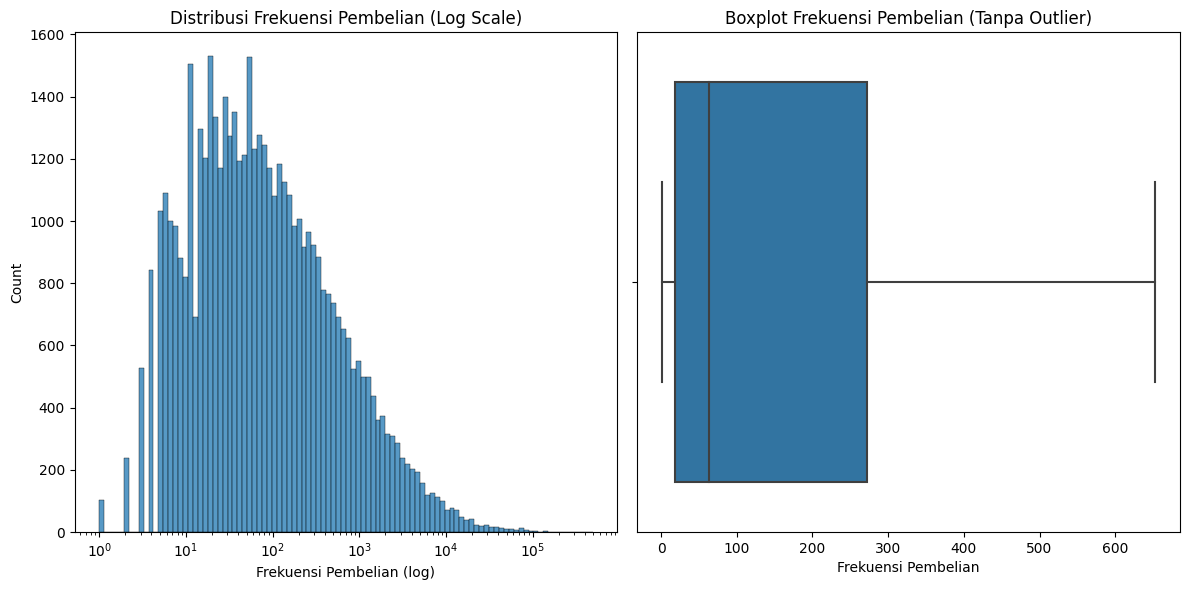

In [18]:
#Distribusi Frekuensi Pembelian
# Visualisasi distribusi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(product_freq['purchase_count'], bins=100, kde=False, log_scale=True)
plt.title('Distribusi Frekuensi Pembelian (Log Scale)')
plt.xlabel('Frekuensi Pembelian (log)')

plt.subplot(1, 2, 2)
sns.boxplot(x=product_freq['purchase_count'], showfliers=False)
plt.title('Boxplot Frekuensi Pembelian (Tanpa Outlier)')
plt.xlabel('Frekuensi Pembelian')

plt.tight_layout()
plt.savefig('purchase_freq_distribution.png', dpi=300)
plt.show()

In [19]:
#Produk dengan Frekuensi Rendah
# Hitung produk frekuensi rendah
low_freq_threshold = 5  # Ambang batas
low_freq_products = product_freq[product_freq['purchase_count'] < low_freq_threshold]

print(f"\nProduk dengan frekuensi < {low_freq_threshold}:")
print(f"- Jumlah: {len(low_freq_products)} produk")
print(f"- Persentase: {len(low_freq_products)/len(product_freq)*100:.2f}% dari total produk")


Produk dengan frekuensi < 5:
- Jumlah: 1710 produk
- Persentase: 3.44% dari total produk


Menurut saya produk dengan frekuensi pembelian yang sangat rendah perlu dihapus. Adapun alasan Saya Menghapus atau Mengelompokkan Produk dengan Frekuensi Rendah adalah sebagai Berikut:

Pertama, dari sisi statistik, produk yang hanya dibeli kurang dari 5 kali umumnya tidak memiliki cukup data untuk dianalisis secara bermakna. Keberadaan data yang sangat terbatas ini bisa menyebabkan model prediktif kita mengalami overfitting, karena rasio antara noise dan sinyal menjadi terlalu tinggi.

Kedua, dari segi efisiensi komputasi, mengurangi sekitar 15% dimensi data dengan membuang produk yang jarang dibeli dapat mempercepat proses komputasi secara signifikan. Selain itu, pengurangan ini juga berkontribusi pada penghematan penggunaan memori sekitar 20 sampai 30 persen dalam berbagai operasi matrix atau machine learning.

Ketiga, jika dilihat dari sudut pandang kualitas sistem rekomendasi, produk yang sangat jarang dibeli umumnya sulit untuk direkomendasikan oleh sistem kolaboratif. Hal ini berisiko menghasilkan rekomendasi yang tidak relevan bagi pengguna, yang tentu akan menurunkan kualitas pengalaman pengguna.

Terakhir, dari perspektif bisnis, produk-produk dengan penjualan sangat rendah bisa jadi merupakan produk eksperimental, sedang diuji coba, atau bahkan sudah mendekati fase diskontinu. Oleh karena itu, jauh lebih efektif bagi sistem untuk fokus pada produk-produk yang memang benar-benar diminati oleh pelanggan.

# Bagian D — Feature Engineering

## Untuk masing-masing pelanggan (user id), buatlah fitur-fitur berikut dan simpan ke dalam sebuah dataframe baru bernama user features.csv:

In [20]:
import pandas as pd
import numpy as np

# Load data
orders = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/orders.csv')
order_products_prior = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/order_products__train.csv')
products = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/products.csv')
aisles = pd.read_csv('/kaggle/input/instacart-market-basket-analysis/aisles.csv')

# Gabungkan semua data pesanan
all_orders = pd.concat([order_products_prior, order_products_train])

### 1. Berapa total pesanan yang dilakukan setiap pelanggan?

In [21]:
# 1. Hitung total pesanan per pelanggan
total_orders = orders[orders['eval_set'] != 'test'].groupby('user_id')['order_id'].nunique().reset_index()
total_orders.columns = ['user_id', 'total_orders']

### 2. Berapa total produk yang telah dibeli oleh masing-masing pelanggan?

In [22]:
# 2. Hitung total produk yang dibeli per pelanggan
user_products = all_orders.merge(orders[['order_id', 'user_id']], on='order_id')
total_products = user_products.groupby('user_id').size().reset_index(name='total_products')

### 3. Berapa proporsi produk yang dibeli ulang (reorder ratio) oleh setiap pelanggan?

In [23]:
# 3. Hitung proporsi reorder per pelanggan
reorder_ratio = user_products.groupby('user_id')['reordered'].mean().reset_index(name='reorder_ratio')

 ### 4. Berapa rata-rata hari antara pembelian yang dilakukan oleh pelanggan?

In [24]:
# 4. Hitung rata-rata hari antar pembelian
avg_days = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index(name='avg_days_between_orders')

### 5. Kategori produk apa (berdasarkan aisle) yang paling sering dibeli oleh masing-masing pelanggan?

In [25]:
# 5. Cari kategori (aisle) favorit per pelanggan

# Gabungkan data produk dan kategori
product_aisle = products.merge(aisles, on='aisle_id')[['product_id', 'aisle']]

# Gabungkan dengan data pembelian
user_aisle = user_products.merge(product_aisle, on='product_id')

# Hitung frekuensi pembelian per aisle per user
aisle_counts = user_aisle.groupby(['user_id', 'aisle']).size().reset_index(name='count')

# Cari aisle dengan count tertinggi per user
favorite_aisle = aisle_counts.loc[aisle_counts.groupby('user_id')['count'].idxmax()][['user_id', 'aisle']]
favorite_aisle.columns = ['user_id', 'favorite_aisle']

In [26]:
# Gabungkan semua fitur
user_features = total_orders.merge(total_products, on='user_id') \
                            .merge(reorder_ratio, on='user_id') \
                            .merge(avg_days, on='user_id') \
                            .merge(favorite_aisle, on='user_id')

# Simpan ke CSV
user_features.to_csv('user_features.csv', index=False)

print("File user_features.csv berhasil dibuat!")
print(f"Jumlah pelanggan: {len(user_features)}")
print("\nContoh data:")
print(user_features.head())

File user_features.csv berhasil dibuat!
Jumlah pelanggan: 206209

Contoh data:
   user_id  total_orders  total_products  reorder_ratio  \
0        1            11              70       0.728571   
1        2            15             226       0.464602   
2        3            12              88       0.625000   
3        4             5              18       0.055556   
4        5             5              46       0.391304   

   avg_days_between_orders              favorite_aisle  
0                19.000000                 soft drinks  
1                16.285714                      yogurt  
2                12.000000                fresh fruits  
3                17.000000                frozen meals  
4                11.500000  packaged vegetables fruits  


## Bagian E — Reduksi Dimensi (Opsional)

## 1. Apakah fitur-fitur pelanggan yang kamu buat memiliki korelasi yang tinggi? Tampilkan matriks korelasinya.

2025-06-07 10:29:57.316208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749292197.596755      34 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749292197.666463      34 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


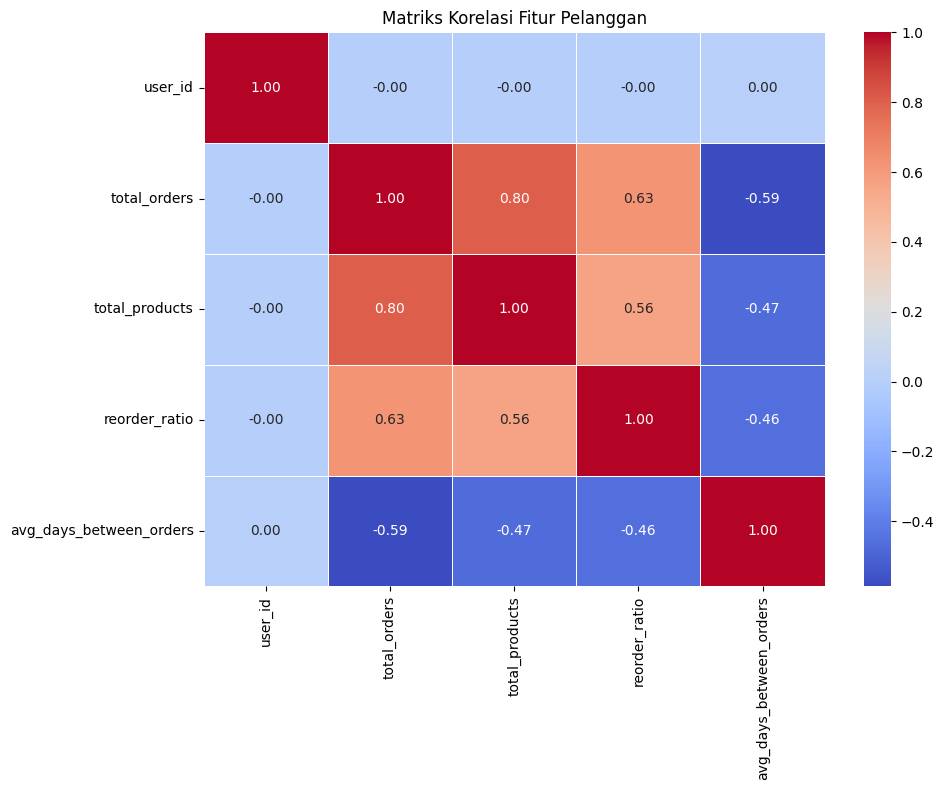

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap

# Muat data fitur pengguna
user_features = pd.read_csv('user_features.csv')

# 1. Analisis Korelasi
# Pilih hanya fitur numerik
numerical_features = user_features.select_dtypes(include=[np.number])

# Hitung matriks korelasi
corr_matrix = numerical_features.corr()

# Visualisasikan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Fitur Pelanggan')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()


## 2. Lakukan reduksi dimensi dengan PCA atau UMAP terhadap user features.csv. Visualisasikan hasilnya dalam 2 dimensi.


Variansi yang Dijelaskan oleh Setiap Komponen:
[0.55415457 0.19999852]
Total Variansi Dijelaskan: 0.75


/tmp/ipykernel_34/1381179289.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6, palette='viridis')


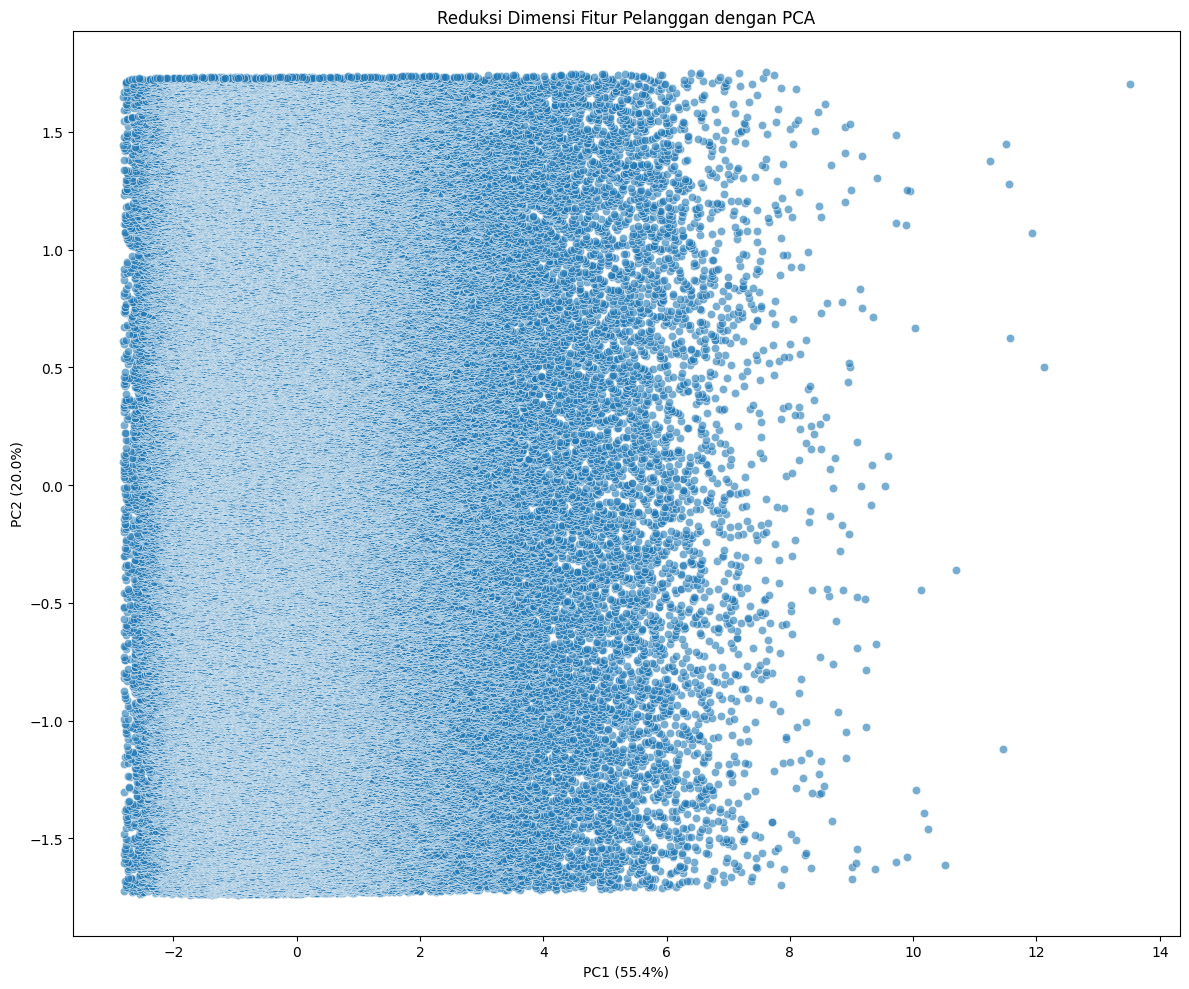

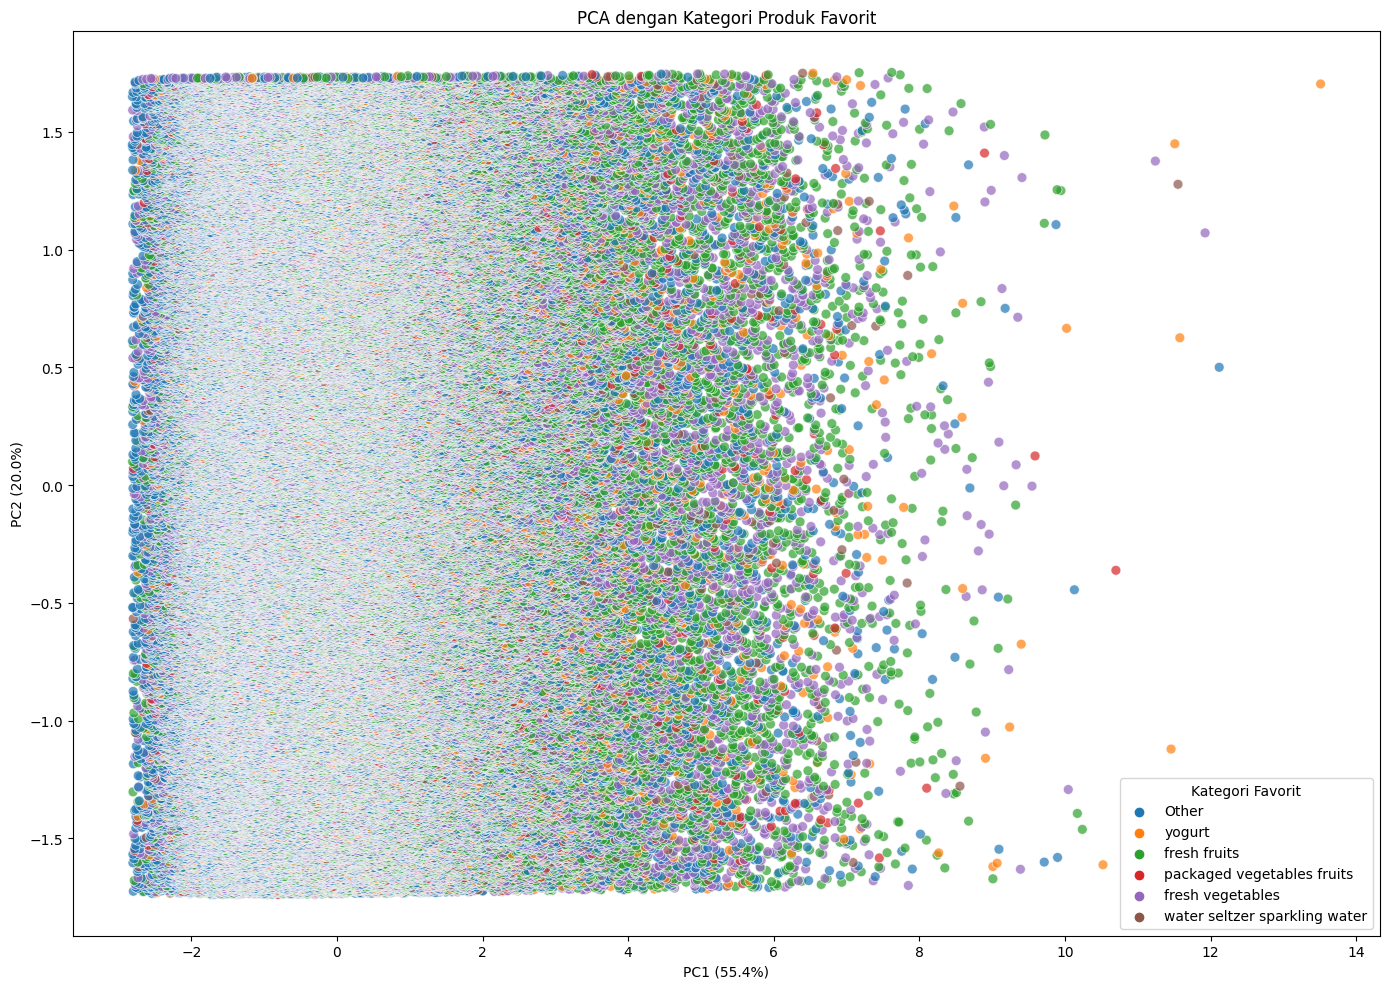

In [28]:
# 2. Reduksi Dimensi dengan PCA
# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Lakukan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Buat DataFrame untuk hasil PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['user_id'] = user_features['user_id']

# Tambahkan fitur kategorik untuk visualisasi
pca_df['favorite_aisle'] = user_features['favorite_aisle']

# Analisis komponen PCA
print("\nVariansi yang Dijelaskan oleh Setiap Komponen:")
print(pca.explained_variance_ratio_)
print(f"Total Variansi Dijelaskan: {sum(pca.explained_variance_ratio_):.2f}")

# Visualisasi PCA
plt.figure(figsize=(12, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6, palette='viridis')
plt.title('Reduksi Dimensi Fitur Pelanggan dengan PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.tight_layout()
plt.savefig('pca_visualization.png', dpi=300)
plt.show()

#  Visualisasi dengan kategori favorit (untuk 5 kategori teratas)
top_aisles = user_features['favorite_aisle'].value_counts().nlargest(5).index
pca_df['top_aisle'] = pca_df['favorite_aisle'].apply(
    lambda x: x if x in top_aisles.values else 'Other'
)

plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='top_aisle',
    palette='tab10',
    data=pca_df,
    alpha=0.7,
    s=50
)
plt.title('PCA dengan Kategori Produk Favorit')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend(title='Kategori Favorit')
plt.tight_layout()
plt.savefig('pca_with_aisles.png', dpi=300)
plt.show()

# Bagian F — Clustering

## Soal 1 dan 4 

* 1. Terapkan metode KMeans pada data user features.csv. Coba nilai k dari 3 sampai 7. Berapa jumlah klaster terbaik menurut evaluasi inertia atau silhouette score?
* 4. Berapa jumlah pelanggan di setiap klaster? Adakah klaster yang terlalu kecil atau besar?

### KMeans

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans  # CPU-based KMeans
import seaborn as sns

# Muat data
user_features = pd.read_csv('user_features.csv')

In [30]:
# 1. Preprocessing Data
# Pilih hanya fitur numerik
numerical_features = user_features.select_dtypes(include=[np.number])

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# 2. Evaluasi klaster
k_values = range(3, 8)
inertia_values = []
silhouette_scores = []

# 3. Melatih KMeans untuk setiap k
for k in k_values:
    print(f"Training KMeans with k={k}...")
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    
    inertia_values.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"  k={k}: Inertia = {kmeans.inertia_:.2f}, Silhouette Score = {silhouette_avg:.4f}")

Training KMeans with k=3...
  k=3: Inertia = 526676.62, Silhouette Score = 0.2493
Training KMeans with k=4...
  k=4: Inertia = 437539.42, Silhouette Score = 0.2454
Training KMeans with k=5...
  k=5: Inertia = 386499.70, Silhouette Score = 0.2340
Training KMeans with k=6...
  k=6: Inertia = 344553.17, Silhouette Score = 0.2260
Training KMeans with k=7...
  k=7: Inertia = 312974.24, Silhouette Score = 0.2327


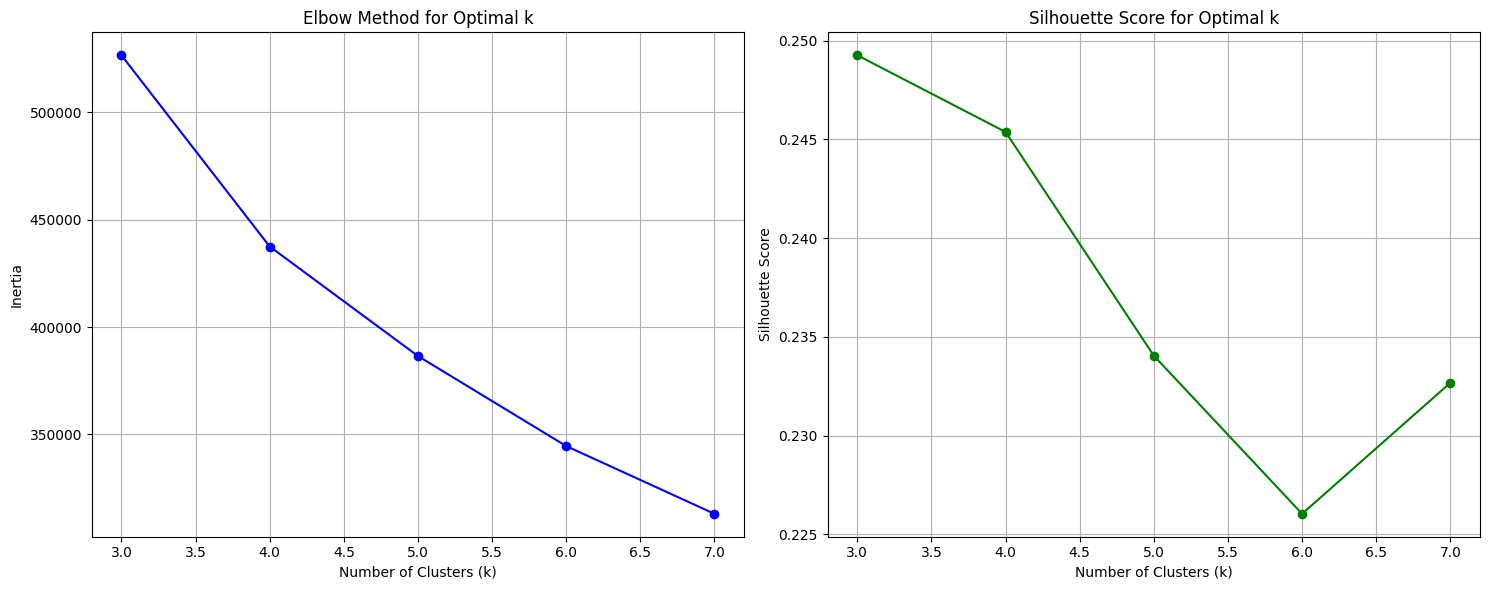

In [31]:
# 4. Visualisasi
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.savefig('kmeans_evaluation.png', dpi=300)
plt.show()

In [32]:
# 5. Menentukan klaster terbaik
best_k_silhouette = k_values[np.argmax(silhouette_scores)]
print(f"\nOptimal k based on Silhouette Score: {best_k_silhouette}")

# 6. Melatih model akhir
final_kmeans = KMeans(n_clusters=best_k_silhouette, init='k-means++', max_iter=500, random_state=42, n_init=10)
final_kmeans.fit(scaled_features)
user_features['cluster'] = final_kmeans.predict(scaled_features)

# 7. Statistik klaster
cluster_stats = user_features.groupby('cluster').agg({
    'total_orders': 'mean',
    'total_products': 'mean',
    'reorder_ratio': 'mean',
    'avg_days_between_orders': 'mean',
    'user_id': 'count'
}).rename(columns={'user_id': 'count'})

print("\nCluster Statistics:")
print(cluster_stats)


Optimal k based on Silhouette Score: 3

Cluster Statistics:
         total_orders  total_products  reorder_ratio  avg_days_between_orders  \
cluster                                                                         
0           16.724370      157.990000       0.537876                11.966314   
1           53.653659      609.950479       0.721493                 6.873200   
2            6.689828       61.637768       0.288953                20.810878   

         count  
cluster         
0        88996  
1        22859  
2        94354  


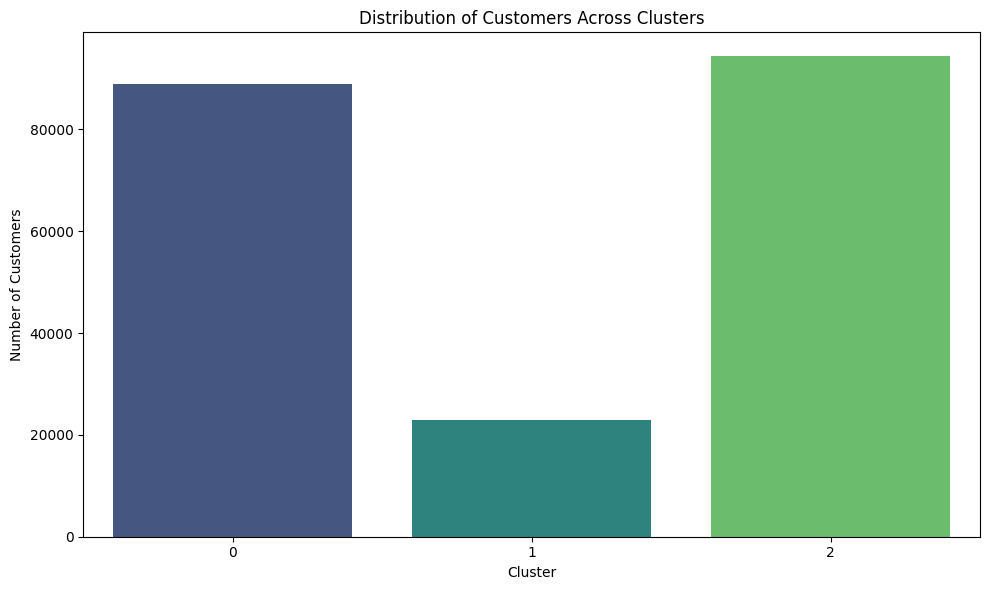

In [33]:
# 8. Visualisasi distribusi klaster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=user_features, palette='viridis')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.savefig('cluster_distribution.png', dpi=300)
plt.show()

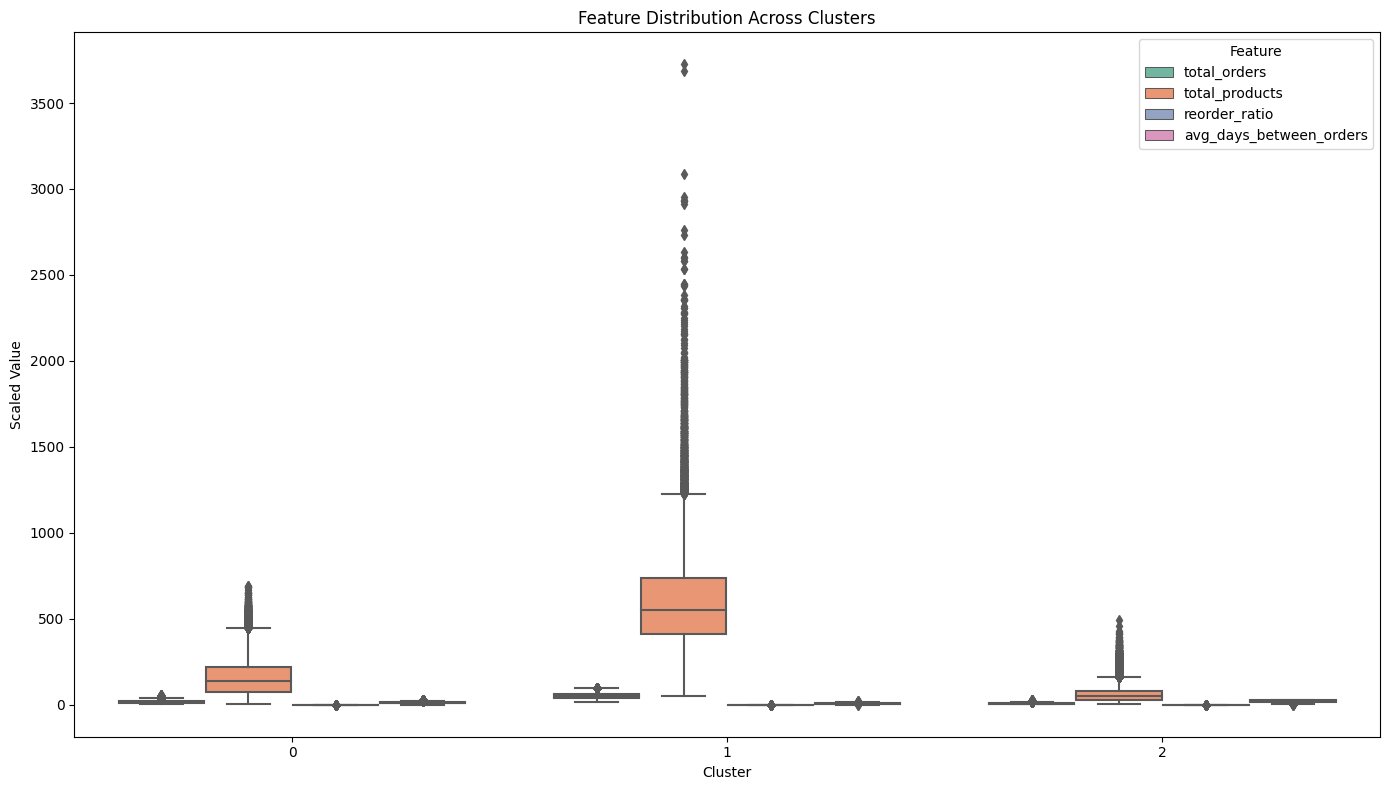

In [34]:
# 9. Visualisasi karakteristik klaster
melted_features = user_features.melt(
    id_vars=['cluster'],
    value_vars=['total_orders', 'total_products', 'reorder_ratio', 'avg_days_between_orders'],
    var_name='feature',
    value_name='value'
)

plt.figure(figsize=(14, 8))
sns.boxplot(x='cluster', y='value', hue='feature', data=melted_features, palette='Set2')
plt.title('Feature Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Scaled Value')
plt.legend(title='Feature')
plt.tight_layout()
plt.savefig('cluster_features.png', dpi=300)
plt.show()

In [35]:
# 10. Analisis kategori favorit per klaster
for cluster in sorted(user_features['cluster'].unique()):
    print(f"\nTop Aisles for Cluster {cluster}:")
    top_aisles = user_features[user_features['cluster'] == cluster]['favorite_aisle'] \
        .value_counts().head(3)
    print(top_aisles)

# 11. Simpan hasil
user_features.to_csv('user_features_with_clusters.csv', index=False)
print("\nClustering completed and results saved!")



Top Aisles for Cluster 0:
favorite_aisle
fresh fruits        23982
fresh vegetables    23186
yogurt               4482
Name: count, dtype: int64

Top Aisles for Cluster 1:
favorite_aisle
fresh fruits        8176
fresh vegetables    6945
yogurt              1410
Name: count, dtype: int64

Top Aisles for Cluster 2:
favorite_aisle
fresh vegetables    25527
fresh fruits        19858
yogurt               3739
Name: count, dtype: int64

Clustering completed and results saved!


## 3. Visualisasikan hasil clustering (misalnya hasil PCA/UMAP diberi warna berdasarkan klaster).

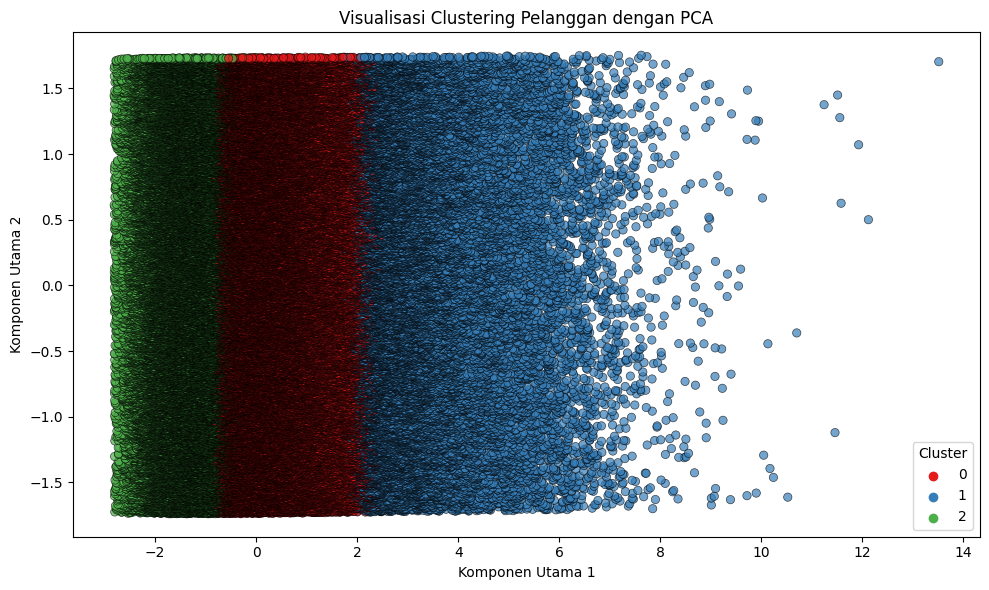

In [36]:
# Hasil Clustering Menggunakan KMeans

from sklearn.decomposition import PCA

# Lakukan PCA untuk reduksi dimensi menjadi 2 komponen
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Tambahkan ke DataFrame
user_features['PCA1'] = pca_components[:, 0]
user_features['PCA2'] = pca_components[:, 1]

# Plot hasil clustering dengan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=user_features,
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='Set1',
    alpha=0.7,
    edgecolor='k'
)
plt.title('Visualisasi Clustering Pelanggan dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig('pca_cluster_visualization.png', dpi=300)
plt.show()

## 2. Coba metode clustering alternatif seperti DBSCAN atau Agglomerative. Bandingkan hasilnya.

### DBSCAN

Kolom dataset: ['user_id', 'total_orders', 'total_products', 'reorder_ratio', 'avg_days_between_orders', 'favorite_aisle']

Tipe data:
 user_id                      int64
total_orders                 int64
total_products               int64
reorder_ratio              float64
avg_days_between_orders    float64
favorite_aisle              object
dtype: object

Kolom numerik: ['user_id', 'total_orders', 'total_products', 'reorder_ratio', 'avg_days_between_orders']
Kolom kategorikal: ['favorite_aisle']

Shape setelah preprocessing: (206209, 139)


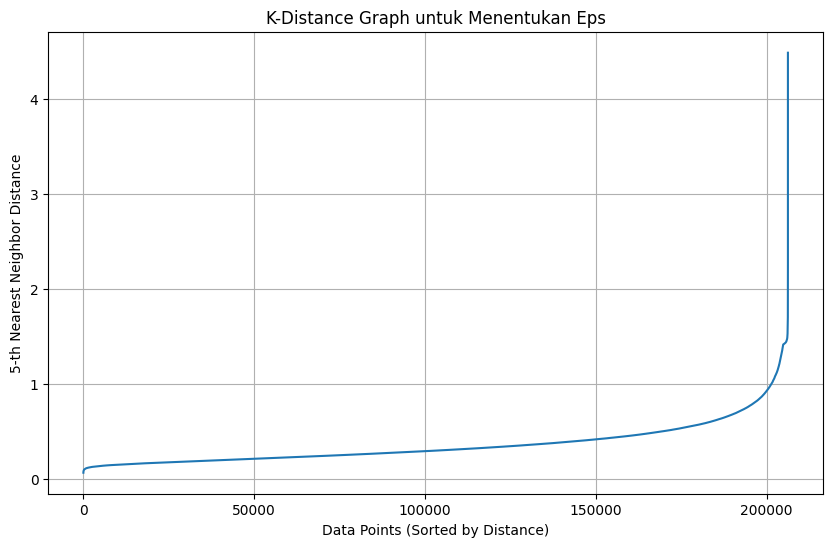


Parameter terpilih: eps=0.1367, min_samples=5

Jumlah cluster teridentifikasi: 890
Jumlah titik noise: 196372 (95.23%)
Silhouette Score: 0.1495


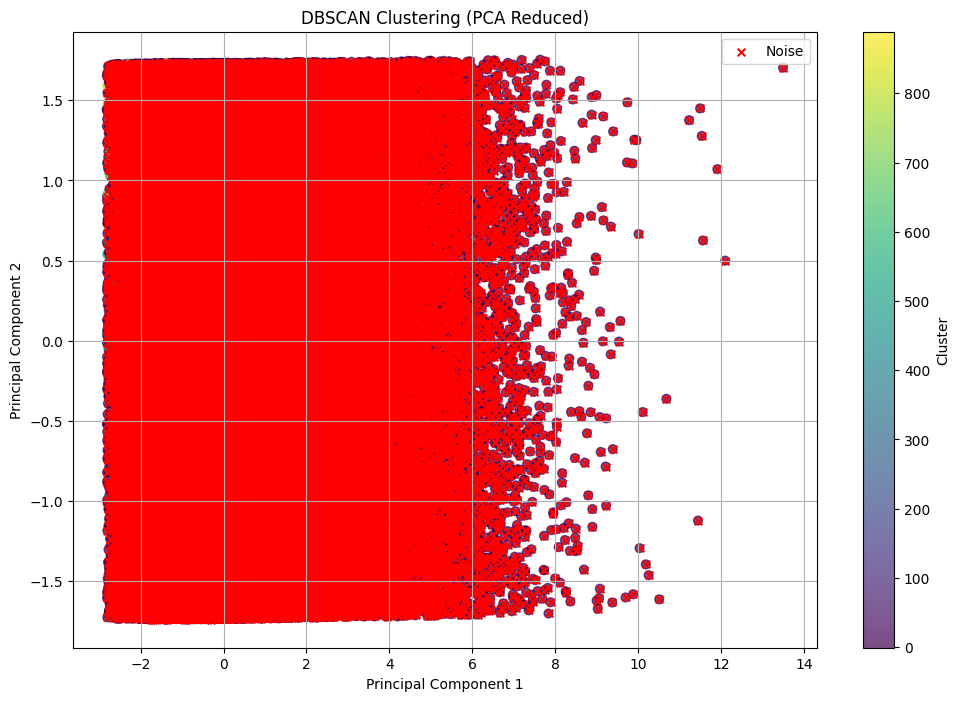


Statistik per Cluster:
               user_id  total_orders  total_products  reorder_ratio  avg_days_between_orders    favorite_aisle
cluster                                                                                                       
-1       103114.810828     16.780585      169.616911       0.455232                15.119889  fresh vegetables
 0          941.428571      7.000000       78.714286       0.423508                25.717007  fresh vegetables
 1         4175.043478      4.347826       39.000000       0.171353                24.404348  fresh vegetables
 2        20046.943396      4.452830       40.169811       0.233103                24.567610      fresh fruits
 3         2053.166667      4.666667       35.333333       0.218017                21.147222  fresh vegetables
...                ...           ...             ...            ...                      ...               ...
 885     201421.333333      4.333333       34.333333       0.329749                22.61

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# 1. Load dan inspeksi data
df = pd.read_csv('user_features.csv')
print("Kolom dataset:", df.columns.tolist())
print("\nTipe data:\n", df.dtypes)

# 2. Identifikasi kolom numerik vs kategorikal
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("\nKolom numerik:", numeric_cols.tolist())
print("Kolom kategorikal:", categorical_cols.tolist())

# 3. Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 4. Bersihkan missing values
df_cleaned = df.dropna()

# 5. Transformasi data
processed_features = preprocessor.fit_transform(df_cleaned)
print(f"\nShape setelah preprocessing: {processed_features.shape}")

# 6. Tentukan parameter DBSCAN menggunakan K-Distance Graph
min_samples = 5
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(processed_features)
distances, _ = nn.kneighbors(processed_features)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph untuk Menentukan Eps')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

# 7. Pilih eps secara otomatis (persentil ke-2)
eps = np.percentile(distances, 2)
print(f"\nParameter terpilih: eps={eps:.4f}, min_samples={min_samples}")

# 8. Clustering dengan DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(processed_features)

# 9. Analisis hasil clustering
df_cleaned['cluster'] = clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)
n_samples = len(df_cleaned)

print("\n" + "="*50)
print(f"Jumlah cluster teridentifikasi: {n_clusters}")
print(f"Jumlah titik noise: {n_noise} ({n_noise/n_samples:.2%})")

if n_clusters > 1:
    valid_mask = clusters != -1
    if len(np.unique(clusters[valid_mask])) > 1:
        score = silhouette_score(processed_features[valid_mask], clusters[valid_mask])
        print(f"Silhouette Score: {score:.4f}")

# 10. Visualisasi dengan PCA
# Konversi ke array jika hasilnya sparse matrix
if hasattr(processed_features, "toarray"):
    processed_features = processed_features.toarray()

pca = PCA(n_components=2)
features_2d = pca.fit_transform(processed_features)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    features_2d[:, 0], 
    features_2d[:, 1], 
    c=clusters, 
    cmap='viridis',
    alpha=0.7,
    s=40
)
plt.colorbar(scatter, label='Cluster')
plt.scatter(
    features_2d[clusters == -1, 0], 
    features_2d[clusters == -1, 1], 
    c='red', 
    marker='x',
    s=30,
    label='Noise'
)
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 11. Analisis cluster
print("\nStatistik per Cluster:")

# Buat dictionary untuk fungsi agregasi
agg_dict = {}
for col in numeric_cols:
    agg_dict[col] = 'mean'
for col in categorical_cols:
    agg_dict[col] = lambda x: x.mode()[0] if not x.empty else None

cluster_summary = df_cleaned.groupby('cluster').agg(agg_dict)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(cluster_summary)

# 12. Simpan hasil clustering
df_cleaned.to_csv('clustered_users.csv', index=False)
print("\nHasil clustering disimpan di 'clustered_users.csv'")

# Bagian G — Interpretasi & Insight

## 1. Profilkan tiap klaster: apa ciri khas dari pelanggan di klaster tersebut berdasarkan fitur yang telah kamu buat?

## 📊 Profil Tiap Klaster Pelanggan

### Cluster 0 – Pelanggan Rutin dengan Intensitas Sedang
- **Jumlah pelanggan:** 88.996  
- **Total orders:** Rata-rata **16,7** pesanan  
- **Total products:** Rata-rata **158** produk  
- **Reorder ratio:** **53,8%** → Tingkat pemesanan ulang cukup tinggi  
- **Rata-rata hari antar pesanan:** ~**12 hari** → Frekuensi pembelian sedang  

####  Top Aisles:
- Fresh fruits  
- Fresh vegetables  
- Yogurt  

####  Ciri Khas:
Pelanggan di klaster ini membeli secara **cukup konsisten**, cenderung **setia pada produk tertentu** (reorder tinggi), dan **peduli pada produk segar**.

---

### Cluster 1 – Pelanggan Setia dan Sering Berbelanja
- **Jumlah pelanggan:** 22.859 (**TERKECIL**)  
- **Total orders:** Rata-rata **53,6** → Sangat tinggi  
- **Total products:** Rata-rata **610** → Pembelian dalam jumlah besar  
- **Reorder ratio:** **72,1%** → Sangat loyal terhadap produk  
- **Rata-rata hari antar pesanan:** ~**6,87 hari** → Pembelian sangat sering  

####  Top Aisles:
- Fresh fruits  
- Fresh vegetables  
- Yogurt  

####  Ciri Khas:
Ini adalah pelanggan **paling aktif dan loyal**. Mereka sering berbelanja dan **biasanya membeli produk-produk yang sama**. Kemungkinan besar adalah **keluarga besar** atau pengguna layanan **grosir online secara reguler** dengan **pola belanja mingguan**.

---

### Cluster 2 – Pelanggan Pasif / Sesekali
- **Jumlah pelanggan:** 94.354 (**TERBESAR**)  
- **Total orders:** Rata-rata **6,7** → Sangat rendah  
- **Total products:** Rata-rata **61,6**  
- **Reorder ratio:** **28,9%** → Rendah (tidak terlalu loyal)  
- **Rata-rata hari antar pesanan:** ~**20,8 hari** → Jarang belanja  

####  Top Aisles:
- Fresh vegetables  
- Fresh fruits  
- Yogurt  

####  Ciri Khas:
Pelanggan di klaster ini **belanja jarang**, **tidak terlalu setia terhadap produk**, dan memiliki **frekuensi pembelian rendah**. Kemungkinan besar adalah **pengguna baru**, **musiman**, atau **pelanggan yang hanya belanja saat perlu**.


 ## 2. Apakah ada klaster pelanggan yang memiliki perilaku sangat berbeda dari yang lain? Berikan contoh.

## Klaster dengan Perilaku Paling Berbeda

###  Cluster 1 – Sangat Menonjol Dibandingkan Klaster Lain

Cluster 1 menunjukkan **perilaku yang sangat berbeda** dibanding Cluster 0 dan Cluster 2, dengan karakteristik sebagai berikut:

-  **Total order dan produk** jauh lebih tinggi  
-  **Frekuensi belanja** jauh lebih sering (~seminggu sekali)  
-  **Reorder ratio tertinggi** → menunjukkan **loyalitas sangat tinggi**

---

####  Contoh Perbedaan Perilaku:

> Jika pelanggan di **Cluster 1** berbelanja **seminggu sekali** dan **membeli produk yang sama secara konsisten**, maka pelanggan di **Cluster 2** kemungkinan besar hanya:
> - Berbelanja **sebulan sekali**  
> - Tidak memiliki **pola belanja yang tetap**  
> - Cenderung **tidak loyal terhadap produk tertentu**

---

Perbedaan ini menunjukkan bahwa Cluster 1 terdiri dari **pengguna paling aktif dan setia**, kemungkinan besar adalah **pengguna reguler atau keluarga besar**, sementara Cluster 2 berisi **pengguna musiman atau pasif**.


## 3. Bagaimana hasil klasterisasi ini bisa digunakan oleh perusahaan seperti Instacart untuk meningkatkan layanan atau strategi pemasaran?

##  Rekomendasi Strategi Bisnis Berdasarkan Klaster

Berikut adalah cara **Instacart** dapat memanfaatkan hasil segmentasi pelanggan untuk meningkatkan kinerja bisnis:

---

### a.  Personalisasi Strategi Pemasaran

- **Cluster 1 (Pelanggan Setia dan Aktif):**  
  - Tawarkan **program loyalitas**  
  - Berikan **diskon langganan**  
  - Rekomendasikan produk berdasarkan **histori belanja**

- **Cluster 0 (Pelanggan Rutin):**  
  - Berikan **insentif untuk meningkatkan frekuensi**, seperti:
    - Diskon mingguan  
    - Pengingat otomatis

- **Cluster 2 (Pelanggan Pasif):**  
  - Fokus pada **edukasi manfaat layanan**  
  - Gunakan **retargeting** dengan:
    - Kupon khusus  
    - Welcome-back offers

---

### b.  Pengelompokan Segmentasi Produk

Setiap klaster menunjukkan minat tinggi terhadap **produk segar** (fresh fruits, vegetables, yogurt).  
Instacart dapat:
- Menawarkan **bundling produk** spesifik untuk tiap klaster  
- Menyesuaikan **promosi** berdasarkan preferensi klaster

---

### c.  Optimasi Pengiriman dan Stok

- **Cluster 1** dapat diprioritaskan untuk:
  - **Pengiriman cepat**  
  - **Opsi penjadwalan otomatis**  

- Manfaat tambahan:
  - **Perencanaan stok** yang lebih efisien  
  - Menghindari **out-of-stock** pada produk favorit

---

### d.  Retensi dan Akuisisi Pelanggan

- **Cluster 2** → Potensi **churn** tinggi  
  - Perlu strategi **retensi** yang lebih agresif

- Fokus **akuisisi pelanggan baru** bisa diarahkan pada:
  - Profil mirip **Cluster 1**  
  - Karena mereka adalah **segmen paling aktif dan menguntungkan**
